# QUESTION - 1

## Using Various Classification techniques to predict the likelihood an employee leaving the company.

### Classification techniques used : 
- Decision tree
- Random forest
- Naive Bayes
- Support Vector Machine (SVM)

<b>Dependency python packages: numpy,pandas,sklearn,scipy,sklearn_pandas, and matplotlib </b>

In [8]:
# Importing required python packages
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn_pandas import DataFrameMapper
import matplotlib.pyplot as plt

Creating the dataframe by loading the employee information dataset.

In [9]:
cols = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years", "sales", "salary"]
df = pd.read_csv('HR_comma_sep.csv', header = 0,names=cols)
# Displaying the sample of dataset:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


Separating attribute to be predicted from rest of the attributes in a dataframe.

In [10]:
# y_col captures 'left' attribute.
y_col = df.left
# deleting 'left' attribute from dataframe
del df['left']

Converting ordinal attributes to numeric equivalent:

In [11]:
# Attributes sales and salary are converted to numeric equivalent
cols_to_modify = ['sales','salary']
cols_to_keep = list(set(df.columns.values).difference(cols_to_modify))

# Mapping the modified attributes to dataframes
modified_cols = [(col, preprocessing.LabelBinarizer()) for col in cols_to_modify]
mapper = DataFrameMapper(modified_cols)

# Creating new dataframe 'data' from existing dataframe 'df' after mapping all the ordinal values with numerics.
data = pd.DataFrame(np.column_stack([mapper.fit_transform(df), df[cols_to_keep].values]))
#data.size

Shuffling the values within dataframe

In [12]:
data.reindex(np.random.permutation(data.index))
data.shape

(14999, 20)

Splitting the data into training and testing sets

In [13]:
X_train = data.loc[:11999]
X_test = data.loc[11999:]
y_train = y_col.loc[:11999]
y_test = y_col.loc[11999:]

## Applying Decision Tree Classifier

In [14]:
# Importing the tree from sklearn library to build decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

#predicting 'y_test' values
pred = clf.predict(X_test)

Confusion matrix for Decision Tree:

In [15]:
confusion_matrix(y_test, pred)


array([[1424,    5],
       [  96, 1475]])

Accuracy score for Decision Tree:

In [16]:
accuracy_score(y_test, pred)

0.96633333333333338

Classification Report for Decision Tree:

In [17]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1429
          1       1.00      0.94      0.97      1571

avg / total       0.97      0.97      0.97      3000



ROC for Decision Tree:

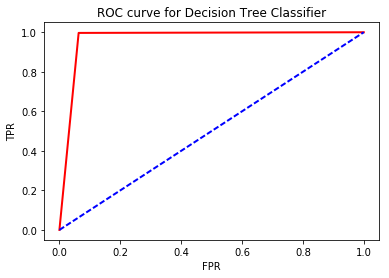

In [18]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(clf.predict(X_test),y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Decision Tree Classifier')
plt.show()

## Applying Random Forest Classifier:

In [19]:
# Importing the RandomForestClassifier from sklearn library to build random forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X_train, y_train)

#predicting 'y_test' values
pred = clf.predict(X_test)

Confusion matrix for Random Forest Classifier:

In [20]:
confusion_matrix(y_test, pred)

array([[1428,    1],
       [  21, 1550]])

Accuracy score for Random Forest Classifier:

In [21]:
accuracy_score(y_test, pred)

0.9926666666666667

Classification Report for Random Forest Classifier:

In [22]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1429
          1       1.00      0.99      0.99      1571

avg / total       0.99      0.99      0.99      3000



ROC for Random Forest Classifier:

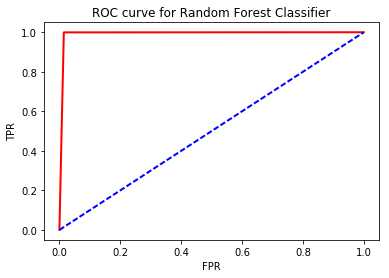

In [23]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(clf.predict(X_test),y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest Classifier')
plt.show()

## Applying Naive Bayes Classifier:

In [24]:
# Importing the GaussianNB from sklearn library to build Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

#predicting 'y_test' values
pred = clf.predict(X_test)

Confusion matrix for Naive Bayes Classifier:

In [25]:
confusion_matrix(y_test, pred)

array([[1162,  267],
       [ 291, 1280]])

Accuracy score for Naive Bayes Classifier:

In [26]:
accuracy_score(y_test, pred)

0.81399999999999995

Classification Report for Naive Bayes Classifier:


In [27]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.80      0.81      0.81      1429
          1       0.83      0.81      0.82      1571

avg / total       0.81      0.81      0.81      3000



ROC for Naive Bayes Classifier:

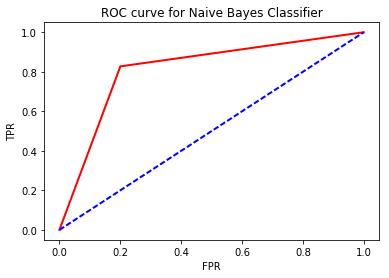

In [28]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(clf.predict(X_test),y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Naive Bayes Classifier')
plt.show()

## Applying Support Vector Machine (SVM) Classifier:

In [29]:
# Importing the svm from sklearn library to build SVM Classifier
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

#predicting 'y_test' values
pred = clf.predict(X_test)

Confusion matrix for SVM Classifier:

In [30]:
confusion_matrix(y_test, pred)

array([[1399,   30],
       [ 179, 1392]])

Accuracy score for SVM Classifier:

In [31]:
accuracy_score(y_test, pred)

0.93033333333333335

Classification Report for SVM Classifier:

In [32]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1429
          1       0.98      0.89      0.93      1571

avg / total       0.93      0.93      0.93      3000



ROC for Naive Bayes Classifier:

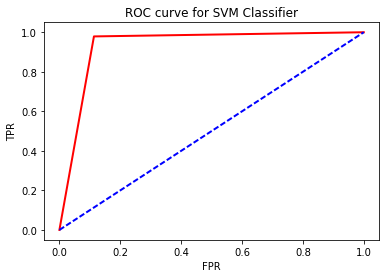

In [33]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(clf.predict(X_test),y_test,drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for SVM Classifier')
plt.show()

From Above Results, It is evident that model built based on <b> Random Forest Classifier </b> works better then other models.
Rankings of models based on accuracy_score and same can also be derived from respective ROC curve:
<table>
    <th>Classification Model</th><th>accuracy_score</th><th>Rankings </th>
    <tr><td> Decision tree</td> <td> 0.96633333333333338</td><td>2nd</td> </tr>
    <tr><td> Random forest</td> <td> 0.9916666666666667</td> <td>1st (Best)</td></tr>
    <tr><td> Naive Bayes</td> <td> 0.81399999999999995</td> <td>4th </td></tr>
    <tr><td> Support Vector Machine (SVM)</td> <td> 0.93033333333333335</td><td>3rd</td> </tr>
</table>